# Import library yang diperlukan

In [0]:
import os

# Numpy untuk Numerical Operator
import numpy as np

# Tensorflow untuk Operasi Tensor dan generator data berupa gambar
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Matplotlib untuk visualisasi data dan gambar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import Dataset dari gdrive

In [2]:
data = '/content/drive/My Drive/rps-cv-images'

kertas_train_dir = os.path.join(data + '/paper')
batu_train_dir = os.path.join(data + '/rock')
gunting_train_dir = os.path.join(data + '/scissors')

print(os.listdir(data))

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']


## Visualisasi data yang sudah diimport

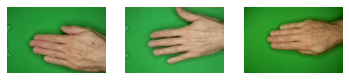

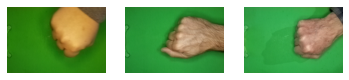

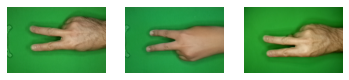

In [3]:
n = 3
for f in [kertas_train_dir, batu_train_dir, gunting_train_dir]:
    for i in range(n):
        sub_plot = plt.subplot(1, n, i + 1)
        sub_plot.axis('Off')
        gambar = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(gambar)
    plt.show()

# Deklarasi kelas CallBack untuk menghentikan proses training data jika akurasi model sudah bagus (jika loss function < 0.04)

In [0]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.04):
            print()
            print("Training dihentikan karena loss function sudah kecil")
            self.model.stop_training = True


callbacks = callBack()

# Proses Pembuatan Model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 33, 64)       

# Proses Training Data

## Persiapkan data Validasi

In [22]:
# Besar data validasi sebesar 20%
data_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2) 

# Ini untuk generator data latih
train_generator = data_gen.flow_from_directory(
    data,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

# Ini untuk generator data validasi
validation_generator = data_gen.flow_from_directory(
    data,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Proses augmentasi gambar

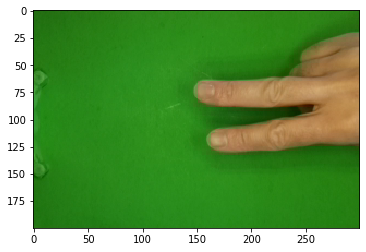

[0. 0. 1.]


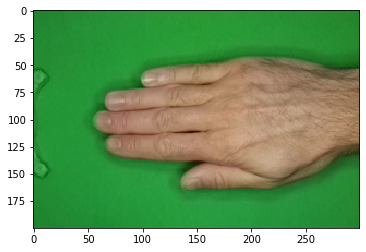

[1. 0. 0.]


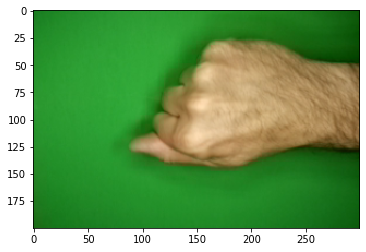

[0. 1. 0.]


In [23]:
x, y = train_generator.next()
plt.imshow(x[0], interpolation='nearest')
plt.show()
print(y[0])

plt.imshow(x[1], interpolation='nearest')
plt.show()
print(y[1])

plt.imshow(x[2], interpolation='nearest')
plt.show()
print(y[2])

## Model Training

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks]
)

Epoch 1/15
13/12 [==============================] - 96s 7s/step - loss: 1.0135 - accuracy: 0.5896 - val_loss: 0.5031 - val_accuracy: 0.8317
Epoch 2/15
13/12 [==============================] - 98s 8s/step - loss: 0.4113 - accuracy: 0.8600 - val_loss: 0.3216 - val_accuracy: 0.8678
Epoch 3/15
13/12 [==============================] - 98s 8s/step - loss: 0.2630 - accuracy: 0.9088 - val_loss: 0.2186 - val_accuracy: 0.9159
Epoch 4/15
13/12 [==============================] - 96s 7s/step - loss: 0.1561 - accuracy: 0.9464 - val_loss: 0.1665 - val_accuracy: 0.9471
Epoch 5/15
13/12 [==============================] - 96s 7s/step - loss: 0.0874 - accuracy: 0.9723 - val_loss: 0.0887 - val_accuracy: 0.9736
Epoch 6/15
13/12 [==============================] - 99s 8s/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.1668 - val_accuracy: 0.9423
Epoch 7/15
13/12 [==============================] - 96s 7s/step - loss: 0.0559 - accuracy: 0.9840 - val_loss: 0.0972 - val_accuracy: 0.9663
Epoch 8/15
13/12 [==

In [25]:
print('Hasil optimum dihasilkan dengan: \nEpoch sebanyak', history.epoch[-1], 'kali')
print('Akurasi sebesar', history.history['accuracy'][-1]*100, '%')

Hasil optimum dihasilkan dengan: 
Epoch sebanyak 7 kali
Akurasi sebesar 98.52125644683838 %


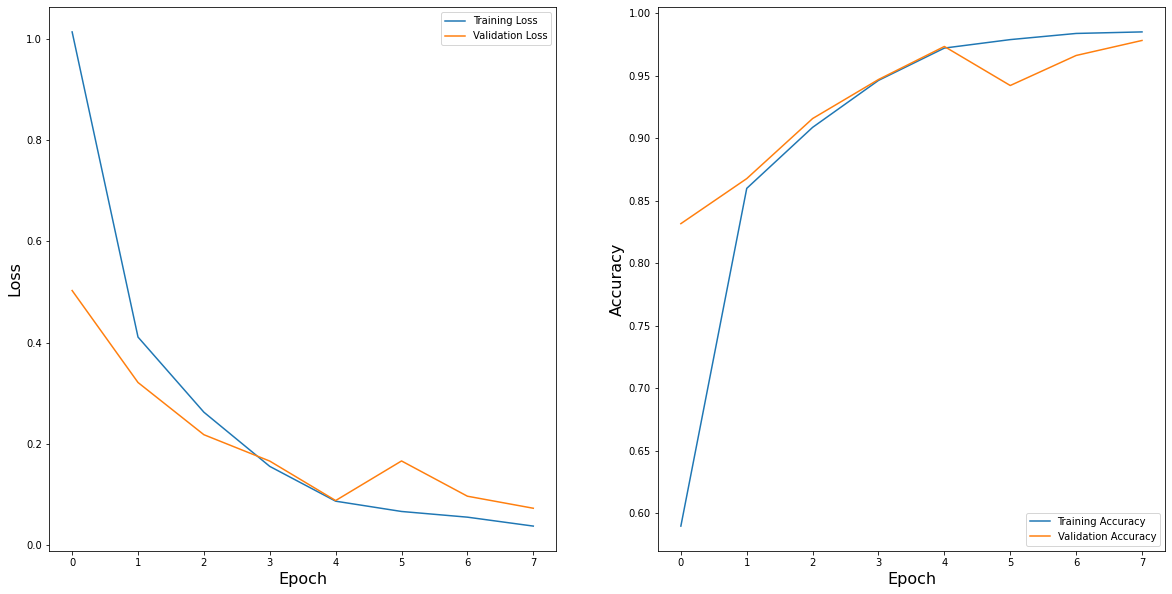

In [26]:
# Trainig Loss/Acc and Validation Loss/Acc visualization
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Mencoba Menguji gambar

## Upload gambar

Saving 3YvRoN0ZGuXVWEbh.png to 3YvRoN0ZGuXVWEbh (1).png
Kertas


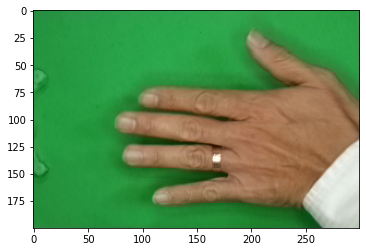

In [65]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

batu_2 = '[[0. 1. 0.]]'
kertas_2 = '[[1. 0. 0.]]'
gunting_2 = '[[0. 0. 1.]]'

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  prediksi = str(classes)

  if prediksi == gunting_2:
    print('Gunting')
  elif prediksi == batu_2:
    print('Batu')
  elif prediksi == kertas_2:
    print('Kertas')
  else:
    print('Gambar yang Anda masukkan salah. Masukkan foto gunting, batu atau kertas!')